In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

In [10]:
titanic = pd.read_csv(r"/content/Titanic-Dataset.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#replacing missing values with mean values
titanic["Age"].fillna(titanic["Age"].mean(),inplace=True)

In [16]:
#fixing embarked
titanic["Embarked"].mode()[0]

'S'

In [17]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0],inplace=True)

In [19]:
#removing missing/null values
titanic = titanic.drop(columns="Cabin",axis=1)

In [20]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
Survived = titanic['Survived'].value_counts().reset_index()
Survived

,Survived,count
0,0,549
1,1,342


In [22]:
counts = titanic.groupby(['Survived', 'Sex']).size()
counts

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

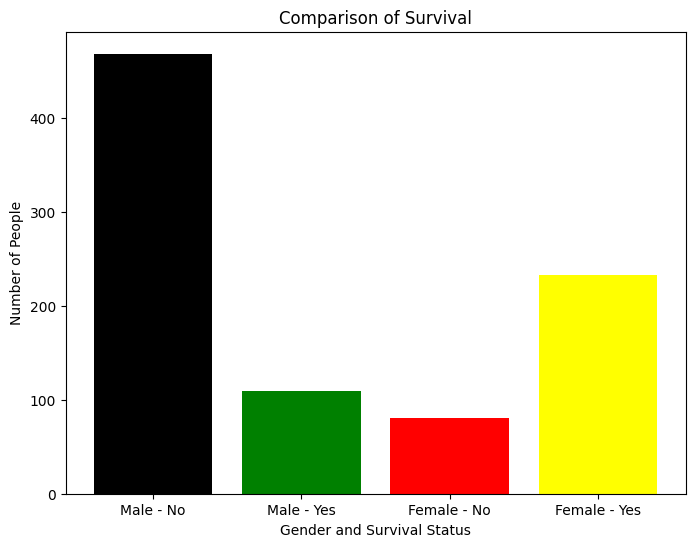

In [23]:
data = {'Survived': ['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes'],
        'Counts': [counts[0]["male"], counts[1]["male"], counts[0]["female"], counts[1]["female"]]}
Survived = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(Survived['Survived'], Survived['Counts'],color=["black","green","red","yellow"])
plt.xticks(Survived['Survived'])
plt.title('Comparison of Survival')
plt.xlabel('Gender and Survival Status')
plt.ylabel('Number of People')
plt.show()

In [26]:
titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Embarked'],axis='columns',inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [27]:
inputs = titanic.drop('Survived',axis='columns')
target = titanic['Survived']
sex=pd.get_dummies(inputs.Sex)
sex.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [28]:
inputs=pd.concat([inputs,sex],axis="columns")
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [31]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    bool   
 4   male    891 non-null    bool   
dtypes: bool(2), float64(2), int64(1)
memory usage: 22.7 KB


In [32]:
inputs.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

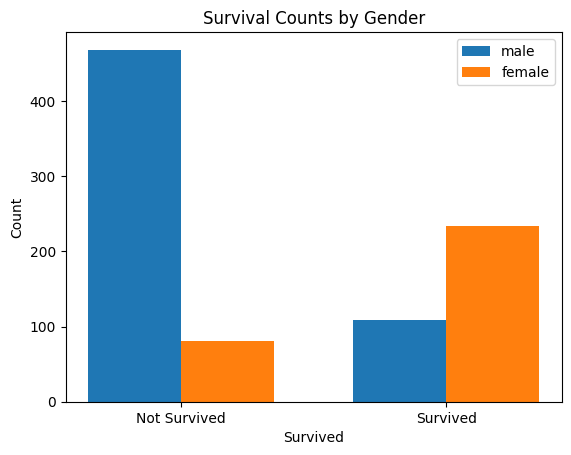

In [33]:
counts = titanic.groupby(['Survived', 'Sex']).size().unstack().fillna(0)

# Define the bar width
bar_width = 0.35
index = counts.index

# Plotting
fig, ax = plt.subplots()

# Plot bars for each Sex
bar1 = ax.bar(index - bar_width/2, counts['male'], bar_width, label='male')
bar2 = ax.bar(index + bar_width/2, counts['female'], bar_width, label='female')
ax.set_xlabel('Survived')
ax.set_ylabel('Count')
ax.set_title('Survival Counts by Gender')
ax.set_xticks(index)
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.legend()

# Display the plot
plt.show()

In [36]:
X_train, X_test, y_train, y_test=train_test_split(inputs,target,test_size=0.2)
X_train

,Pclass,Age,Fare,female,male
671,1,31.000000,52.0000,False,True
421,3,21.000000,7.7333,False,True
283,3,19.000000,8.0500,False,True
630,1,80.000000,30.0000,False,True
698,1,49.000000,110.8833,False,True
...,...,...,...,...,...
507,1,29.699118,26.5500,False,True
86,3,16.000000,34.3750,False,True
744,3,31.000000,7.9250,False,True
260,3,29.699118,7.7500,False,True


In [37]:
X_test

,Pclass,Age,Fare,female,male
127,3,24.000000,7.1417,False,True
172,3,1.000000,11.1333,True,False
520,1,30.000000,93.5000,True,False
181,2,29.699118,15.0500,False,True
694,1,60.000000,26.5500,False,True
...,...,...,...,...,...
764,3,16.000000,7.7750,False,True
647,1,56.000000,35.5000,False,True
308,2,30.000000,24.0000,False,True
65,3,29.699118,15.2458,False,True


In [38]:
y_train

671    0
421    0
283    1
630    1
698    0
      ..
507    1
86     0
744    1
260    0
251    0
Name: Survived, Length: 712, dtype: int64

In [39]:
y_test

127    1
172    1
520    1
181    0
694    0
      ..
764    0
647    1
308    0
65     1
325    1
Name: Survived, Length: 179, dtype: int64

In [40]:
inputs.corr()

,Pclass,Age,Fare,female,male
Pclass,1.000000,-0.331339,-0.549500,-0.131900,0.131900
Age,-0.331339,1.000000,0.091566,-0.084153,0.084153
Fare,-0.549500,0.091566,1.000000,0.182333,-0.182333
female,-0.131900,-0.084153,0.182333,1.000000,-1.000000
male,0.131900,0.084153,-0.182333,-1.000000,1.000000


<Axes: >

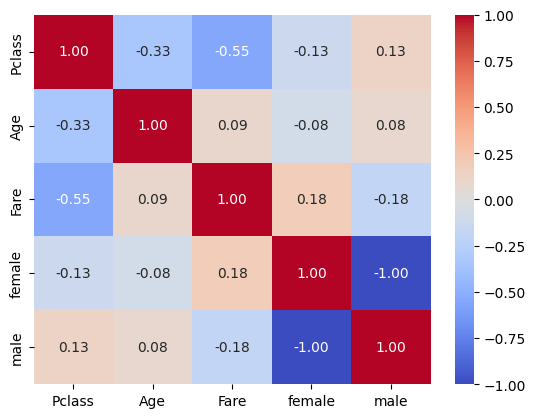

In [41]:
sns.heatmap(inputs.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [45]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
model.score(X_test,y_test)

0.7932960893854749

In [49]:
predict=model.predict(X_test)
matrices=r2_score(predict,y_test)
matrices

0.1174040511727078